In [ ]:
#Lab | Basic Data Cleaning and EDA
#For this lab, we will be using the dataset in the Customer Analysis Business Case. 
#This dataset can be found in the files_for_lab folder.

#Context

#An auto insurance company has collected some data about its customers including their 
#demographics, education, employment, policy details, vehicle information on which insurance 
#policy is and claim amounts. 
#You will help the senior management with some business questions that should help them to 
#better understand their customers, improve their services and improve profitability.

#Some business Objectives for the case study could be:

#Retain customers,
#Analyze relevant customer data,
#Develop focused customer retention programs.
#Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [ ]:
#Instructions

#1. Import the necessary libraries.

#2. Load the we_fn_use_c_marketing_customer_value_analysis.csv 
    #into the variable customer_df (i.e. customer_df = pd.readcsv(""))
    
#3. First, look at its main features (head, shape, info).

#4. Rename the columns so they follow the PE8 (snake case).

#5. Fix the data types of any other column/columns as you might see necessary. 
    #Note that sometimes there are some features you might want to use as categorical, 
    #but they are read as numerical by python (and vice versa). 
    #For eg., if there's a column with year values like 2020, 2021, 2022, etc., 
    #this column might be read as numerical by python, but you would want to use that 
    #column as categorical data. Hint: One thing you can try is to change date column to datetime format.
    
#6. Plot a correlation matrix, and comment on what you observe.

#7. Plot every continuous variable. Comment what you can see in the plots.

#8. Do the same with the categorical variables (be careful, you may need to 
    #change the plot type to one better suited for continuous data!). 
    #Comment what you can see in the plots. You should also delete the column 
    #customer_id before you can try to use a for loop on all the categorical columns. 
    #Discuss why is deleting the column customer_id required. 
    #Hint: Use bar plots to plot categorical data, with each unique category in the column 
    #on the x-axis and an appropriate measure on the y-axis.
    
#9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). 
    #In case you find outliers, comment on what you will do with them.
    
#10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

### 1. Import the necessary libraries.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv("")).

In [80]:
customer_df=pd.read_csv(r'C:\Users\TOSHIBA\Downloads\Ironhack\Labs\we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First, look at its main features (head, shape, info).

In [81]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [82]:
customer_df.shape

(9134, 24)

In [83]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case).

In [84]:
customer_df.columns=[c.lower().replace(' ','_') for c in customer_df.columns]
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 5. Fix the data types of any other column/columns as you might see necessary. 
    #Note that sometimes there are some features you might want to use as categorical, 
    #but they are read as numerical by python (and vice versa). 
    #For eg., if there's a column with year values like 2020, 2021, 2022, etc., 
    #this column might be read as numerical by python, but you would want to use that 
    #column as categorical data. Hint: One thing you can try is to change date column to datetime format.

In [85]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

In [86]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 6. Plot a correlation matrix, and comment on what you observe.

In [87]:
corr_matrix=customer_df.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


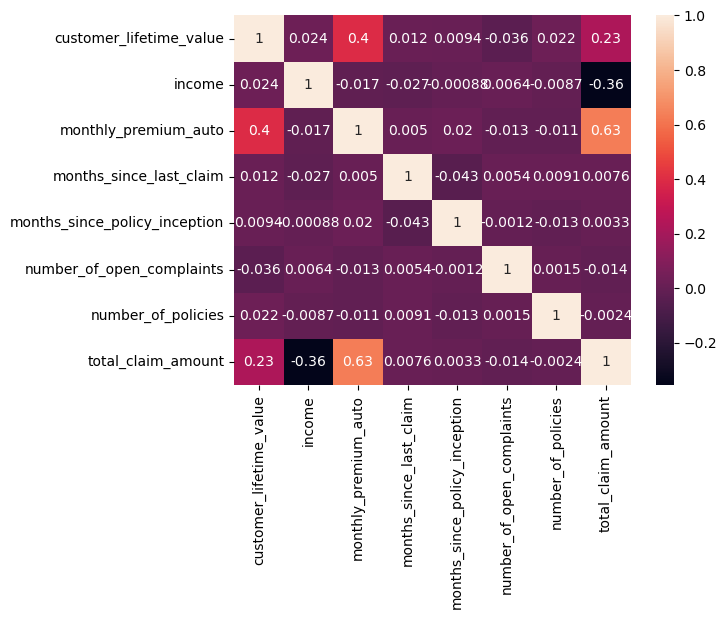

<Figure size 1200x1200 with 0 Axes>

In [88]:
sns.heatmap(corr_matrix, annot=True)
plt.figure(figsize=(12,12))
mascara=np.triu(np.ones_like(customer_df.corr(), dtype=np.bool))
plt.show()

In [ ]:
#Monthly_premium_auto and total_claim_amount have the greatest correlation between the continuous variables.

### 7. Plot every continuous variable. Comment what you can see in the plots.

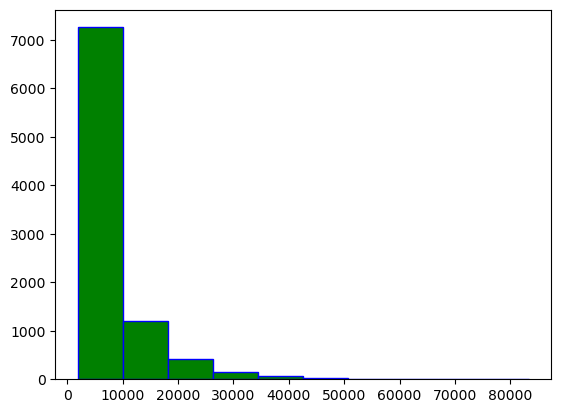

In [72]:
plt.hist(customer_df['customer_lifetime_value'], facecolor='green', edgecolor='blue', bins=10)
plt.show()

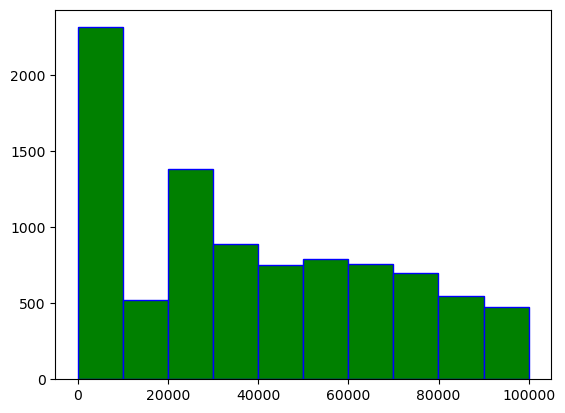

In [73]:
plt.hist(customer_df['income'], facecolor='green', edgecolor='blue', bins=10)
plt.show()

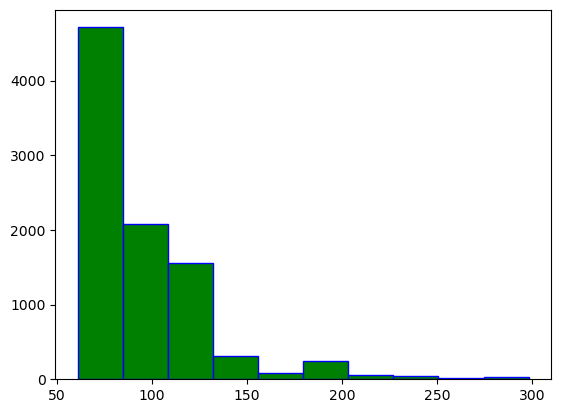

In [74]:
plt.hist(customer_df['monthly_premium_auto'], facecolor='green', edgecolor='blue', bins=10)
plt.show()

In [89]:
plt.hist(customer_df['monthly_premium_auto'], facecolor='green', edgecolor='blue', bins=10)
plt.show()

0        69
1        94
2       108
3       106
4        73
       ... 
9129     73
9130     79
9131     85
9132     96
9133     77
Name: monthly_premium_auto, Length: 9134, dtype: int64

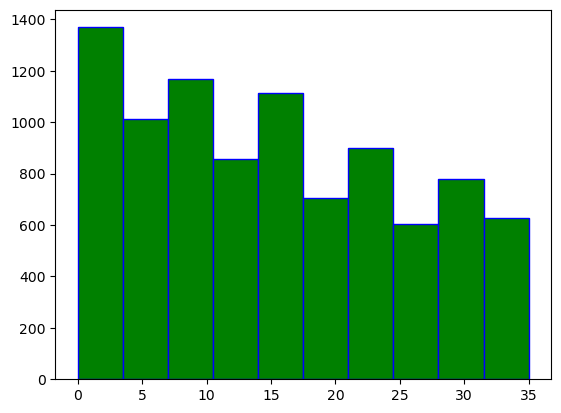

In [90]:
plt.hist(customer_df['months_since_last_claim'], facecolor='green', edgecolor='blue', bins=10)
plt.show()

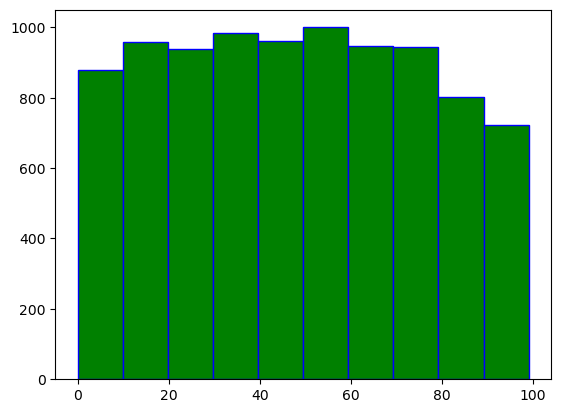

In [92]:
plt.hist(customer_df['months_since_policy_inception'], facecolor='green', edgecolor='blue', bins=10)
plt.show()

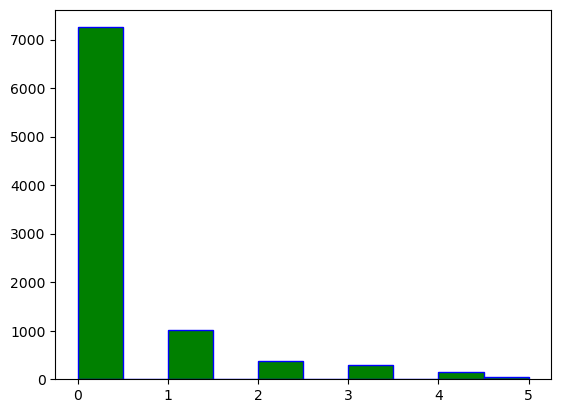

In [93]:
plt.hist(customer_df['number_of_open_complaints'], facecolor='green', edgecolor='blue', bins=10)
plt.show()

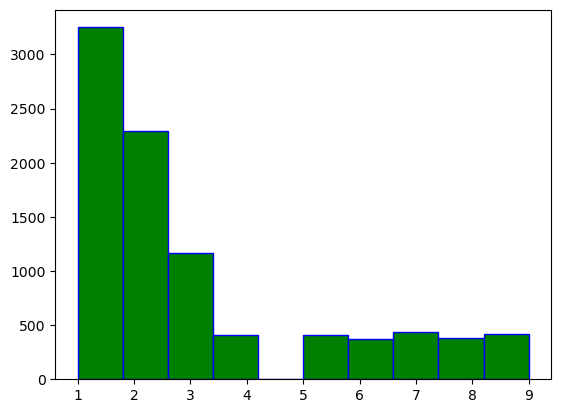

In [94]:
plt.hist(customer_df['number_of_policies'], facecolor='green', edgecolor='blue', bins=10)
plt.show()

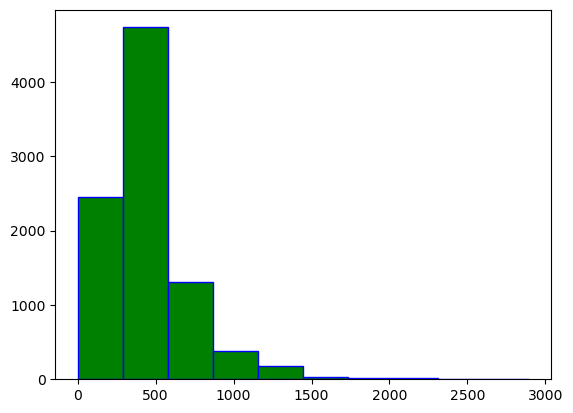

In [95]:
plt.hist(customer_df['total_claim_amount'], facecolor='green', edgecolor='blue', bins=10)
plt.show()

### 8. Do the same with the categorical variables
    #(be careful, you may need to change the plot type to one better suited for continuous data!). 
    #Comment what you can see in the plots. You should also delete the column 
    #customer_id before you can try to use a for loop on all the categorical columns. 
    #Discuss why is deleting the column customer_id required. 
    #Hint: Use bar plots to plot categorical data, with each unique category in the column 
    #on the x-axis and an appropriate measure on the y-axis.

In [106]:
numerical = customer_df.select_dtypes("number")
categorical = customer_df.select_dtypes("object")

In [97]:
customer_df=customer_df.drop(columns=['customer'],axis=1)

<AxesSubplot:>

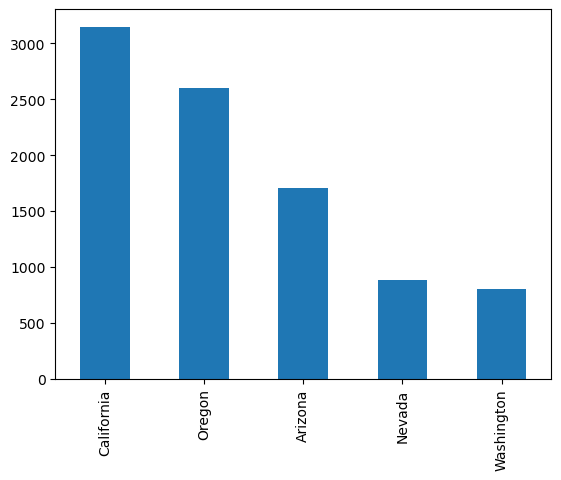

In [98]:
customer_df['state'].value_counts().plot(kind='bar')

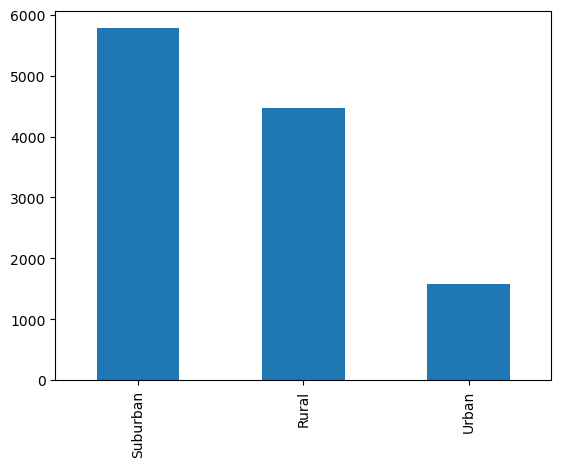

In [105]:
customer_df['gender'].value_counts().plot(kind='bar')
customer_df['location_code'].value_counts().plot(kind='bar')
plt.show()

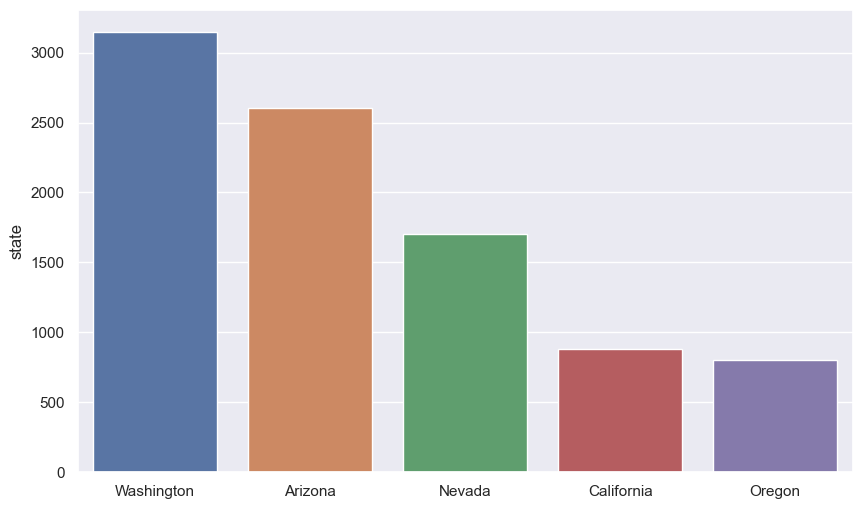

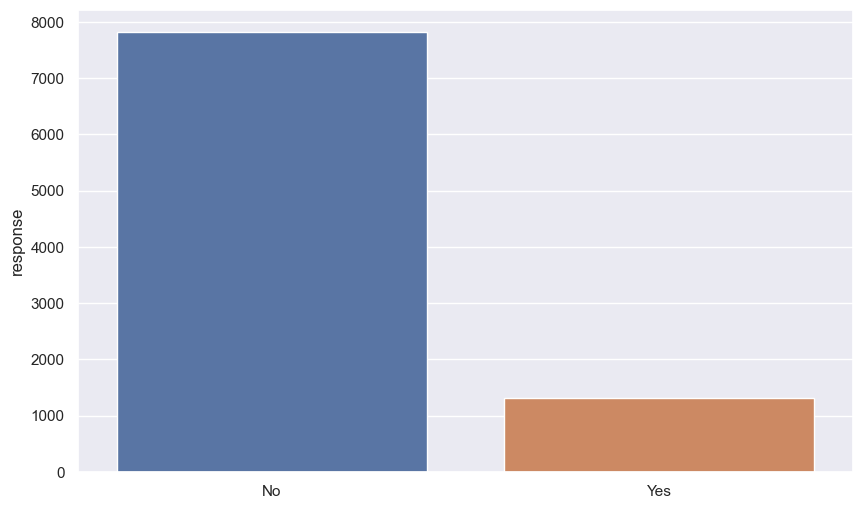

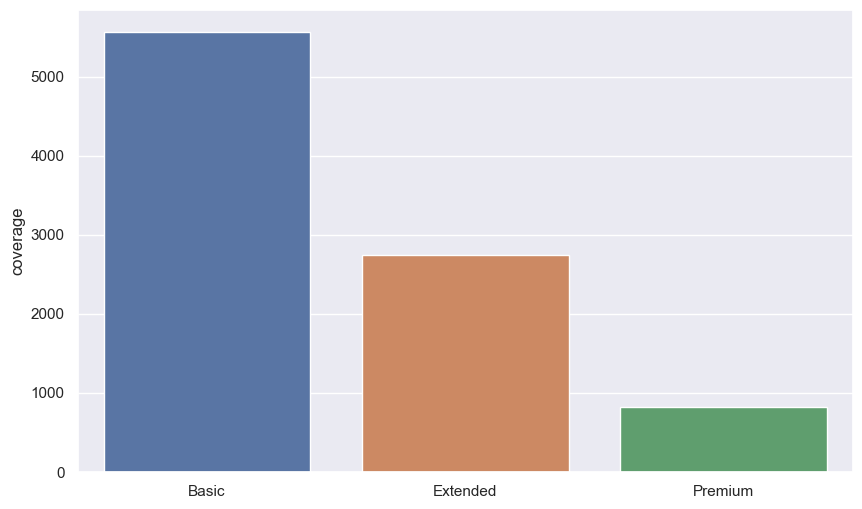

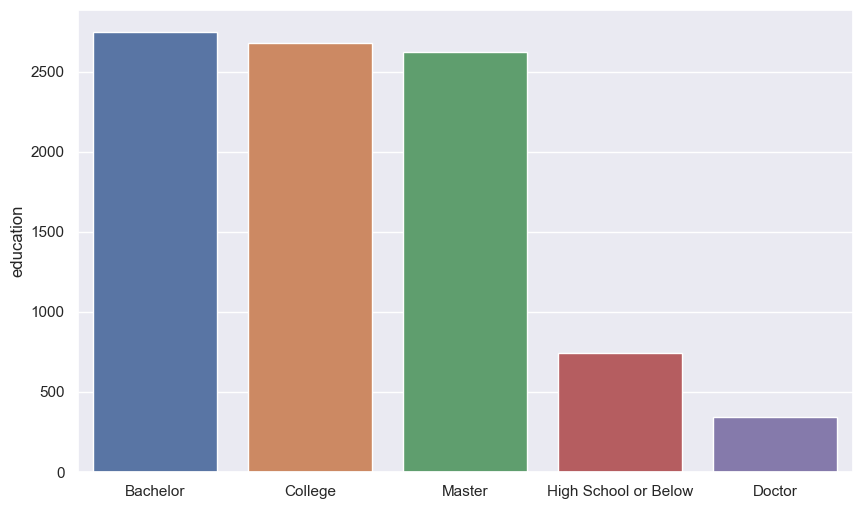

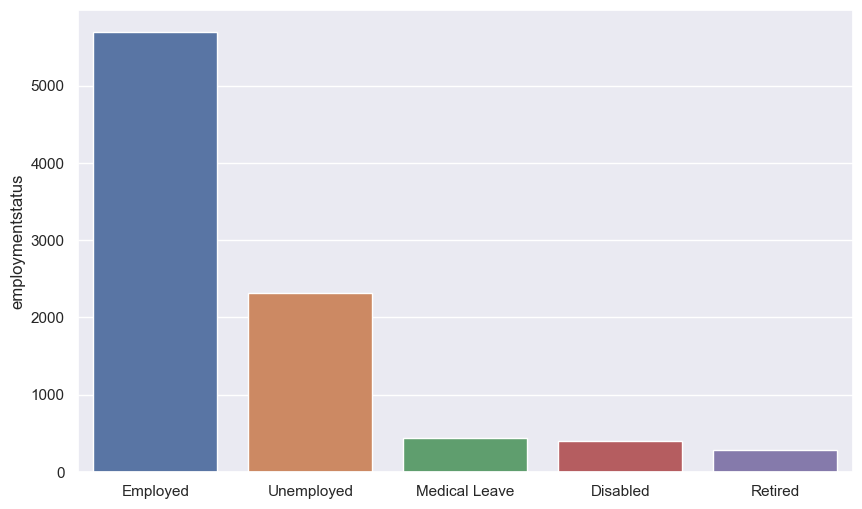

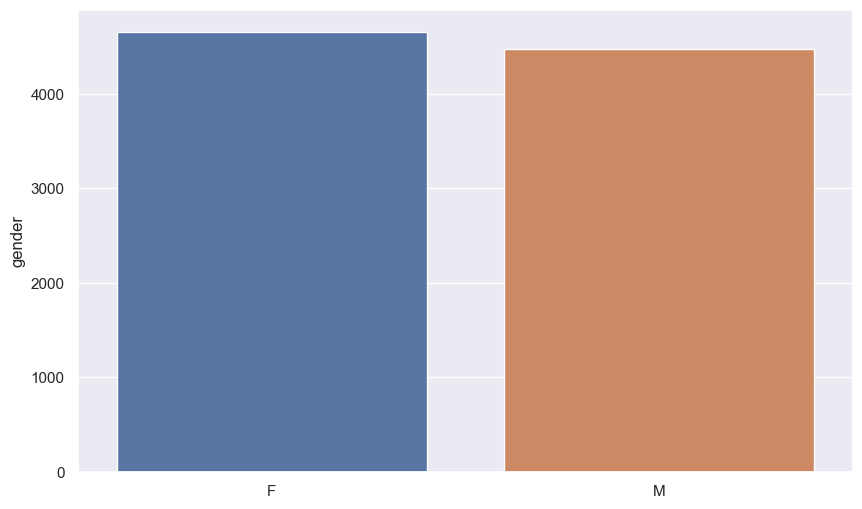

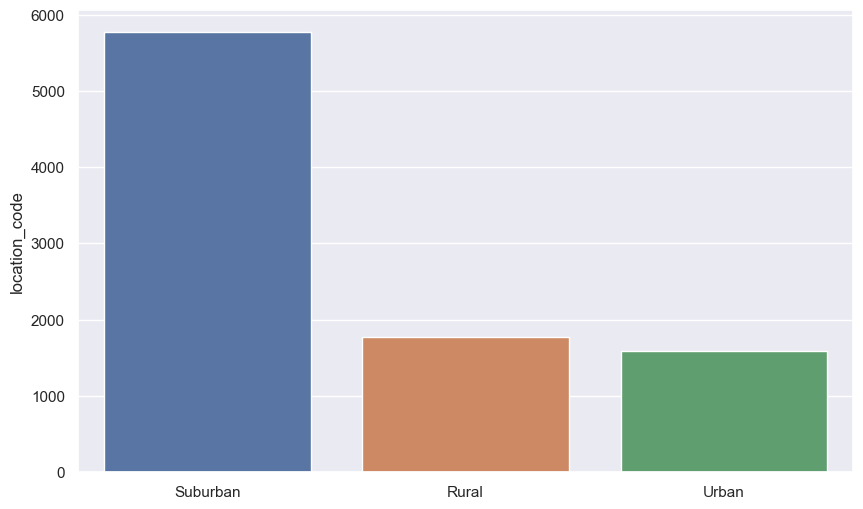

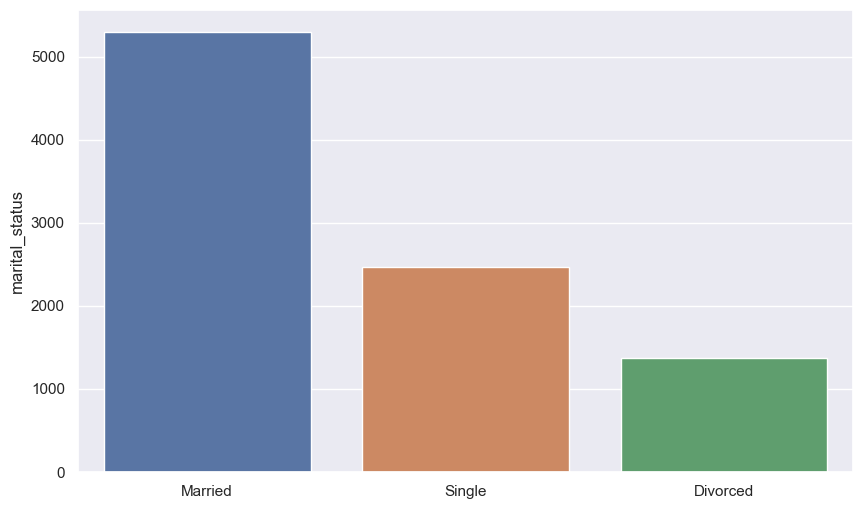

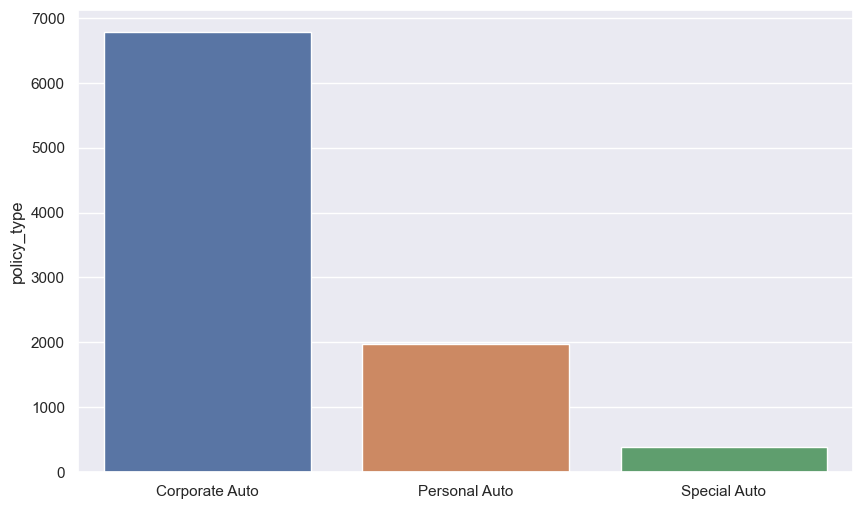

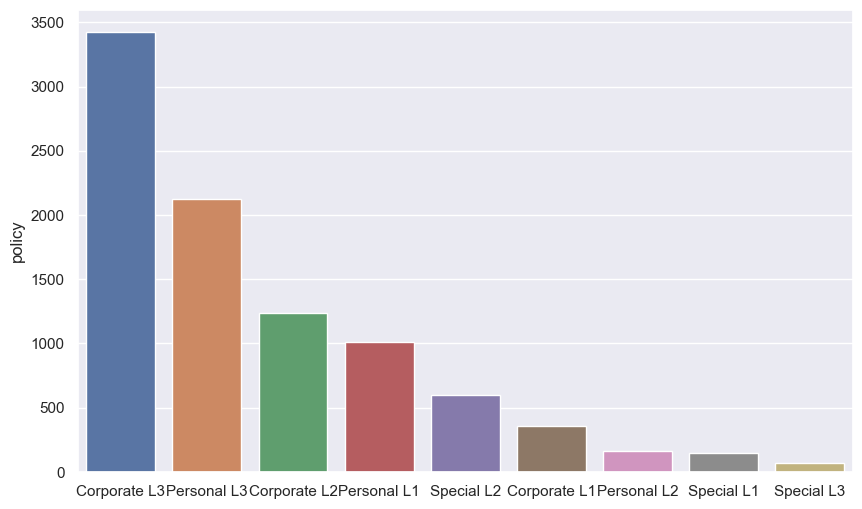

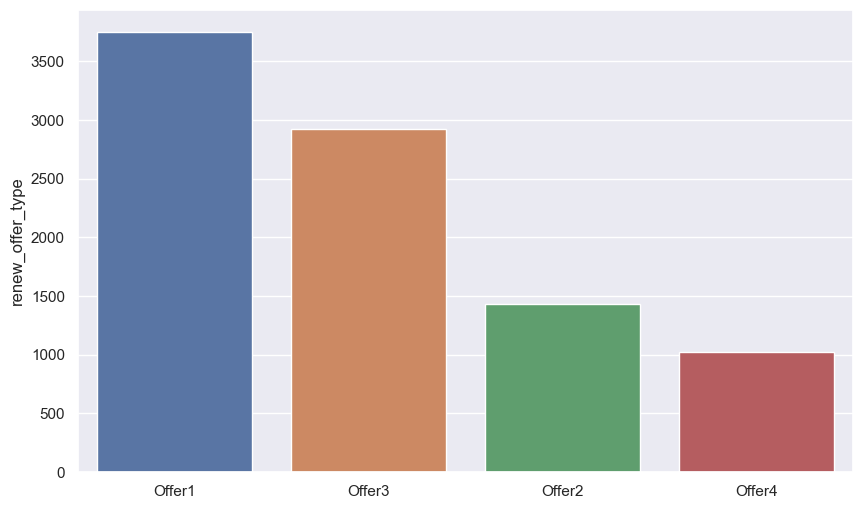

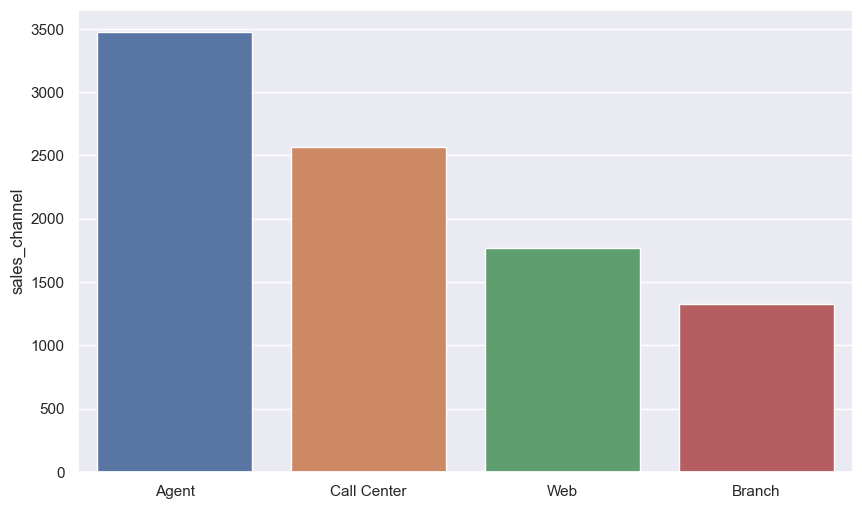

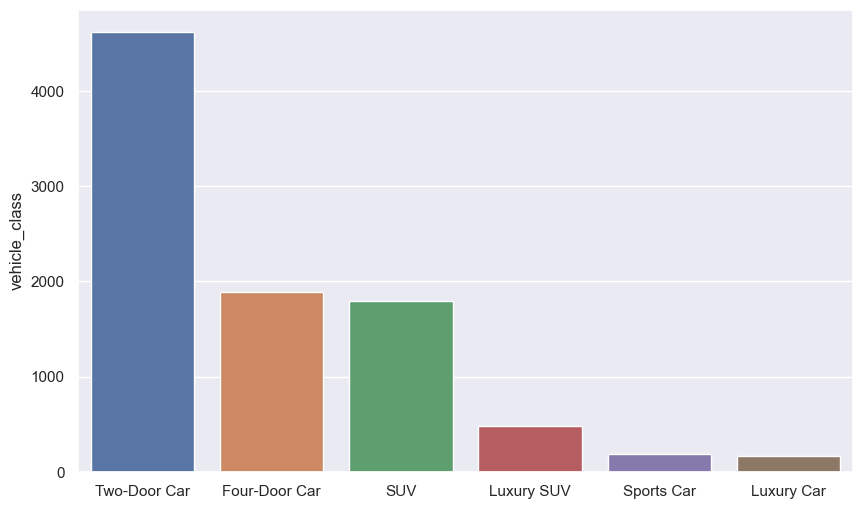

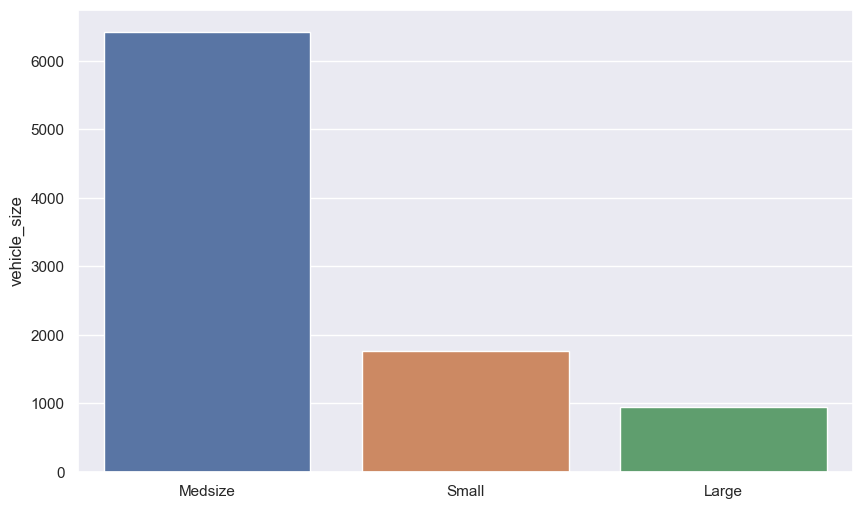

In [108]:
sns.set(rc={'figure.figsize':(10,6)})
for i in categorical.columns:
    sns.barplot(x=categorical[i].unique(),y=categorical[i].value_counts(),data=categorical)
    plt.show()

### 9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). 
    #In case you find outliers, comment on what you will do with them.

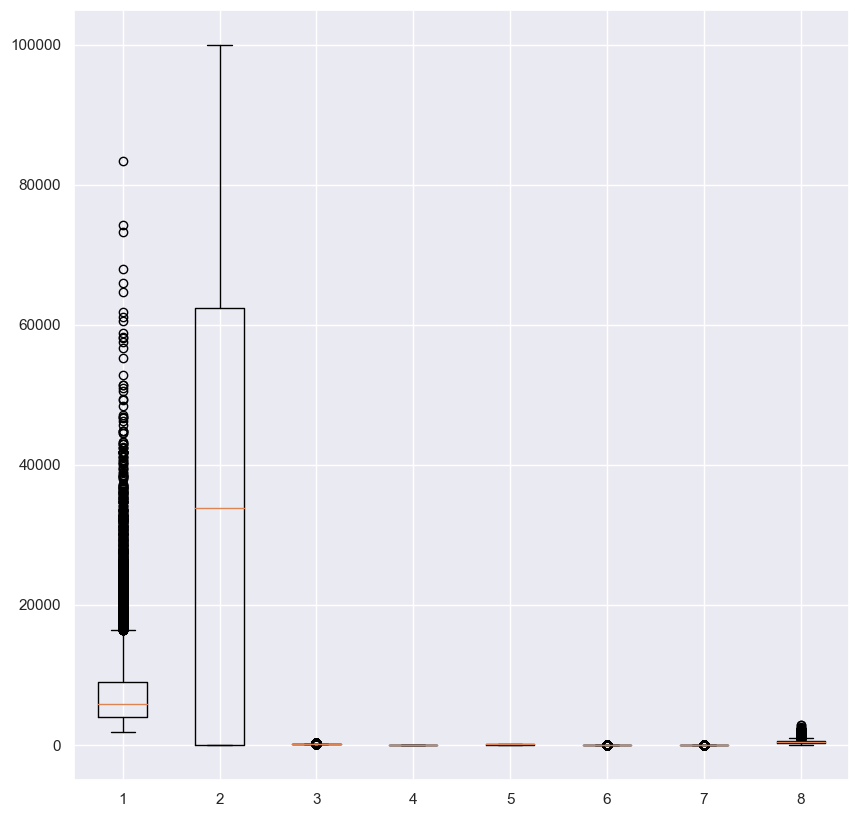

In [114]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(numerical)
plt.show()

In [ ]:
#I'm going to get rid of them by using the IQR method.

<AxesSubplot:xlabel='customer_lifetime_value'>

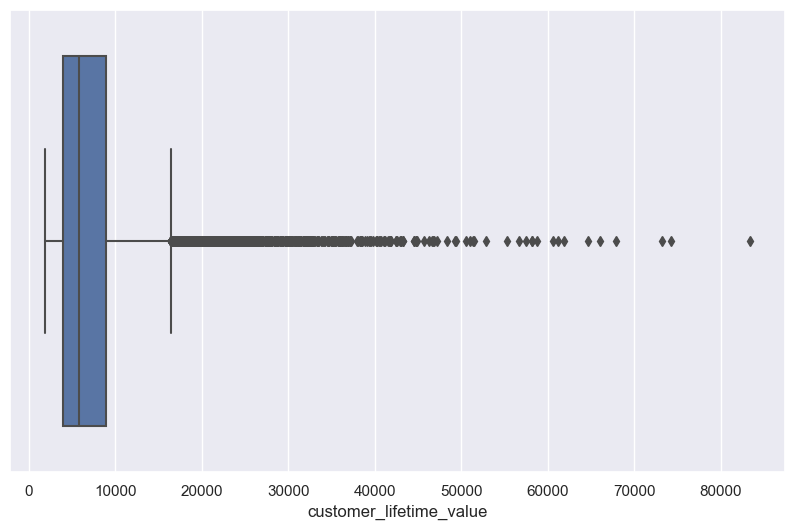

In [121]:
sns.boxplot(customer_df['customer_lifetime_value'])

<AxesSubplot:xlabel='income'>

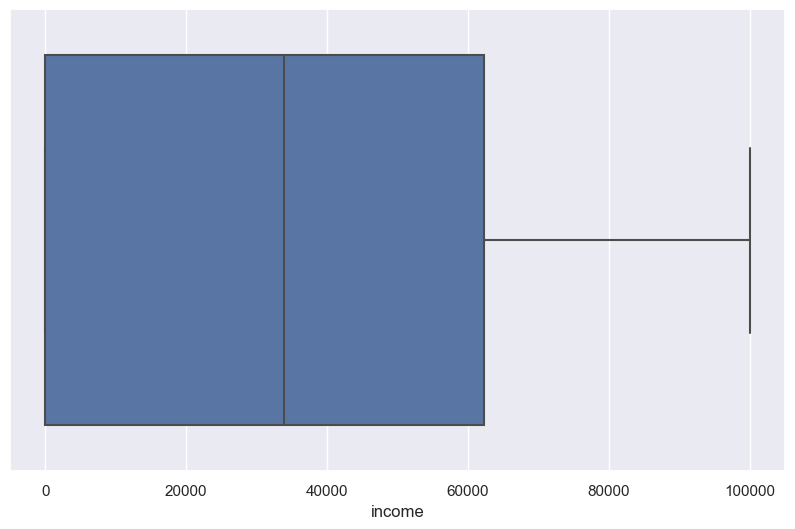

In [119]:
sns.boxplot(customer_df['income'])

<AxesSubplot:xlabel='monthly_premium_auto'>

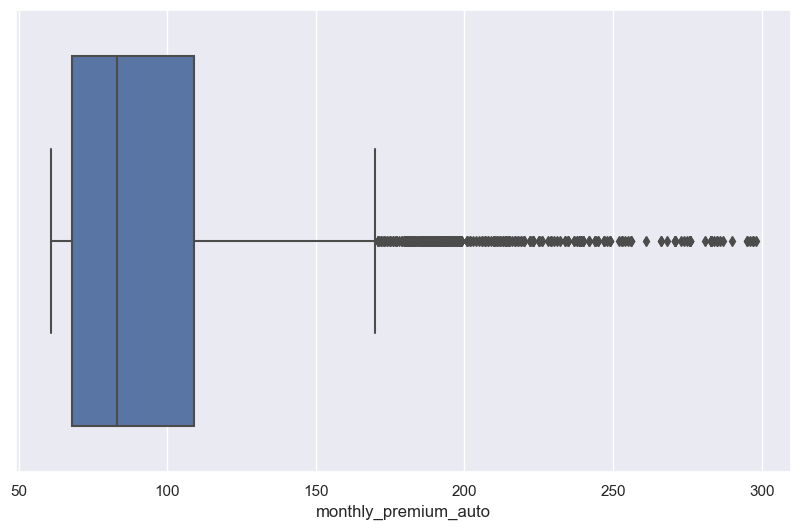

In [126]:
sns.boxplot(customer_df['monthly_premium_auto'])

<AxesSubplot:xlabel='months_since_last_claim'>

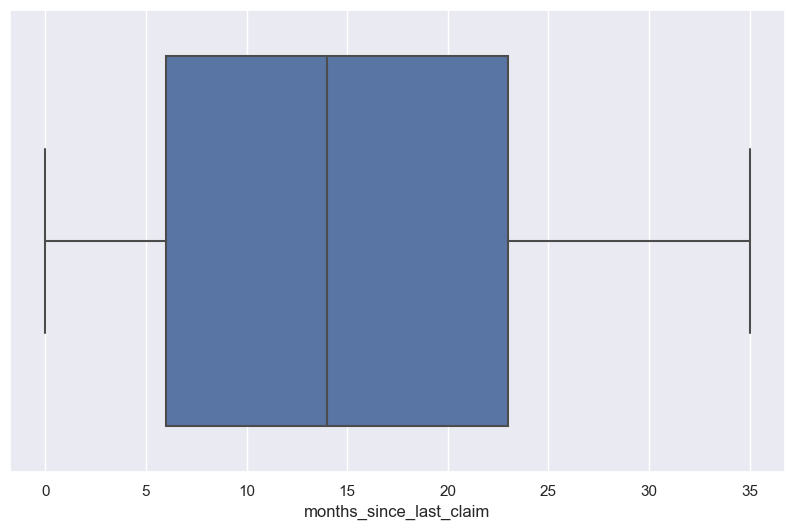

In [128]:
sns.boxplot(customer_df['months_since_last_claim'])

<AxesSubplot:xlabel='months_since_policy_inception'>

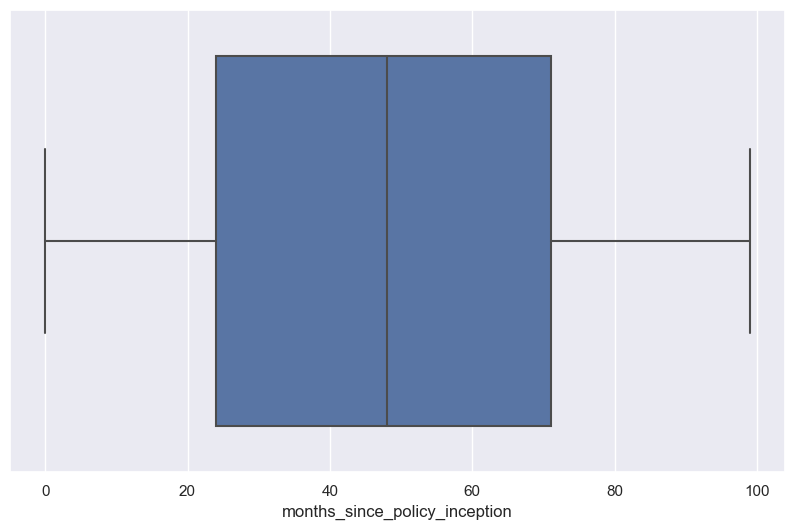

In [129]:
sns.boxplot(customer_df['months_since_policy_inception'])

<AxesSubplot:xlabel='number_of_open_complaints'>

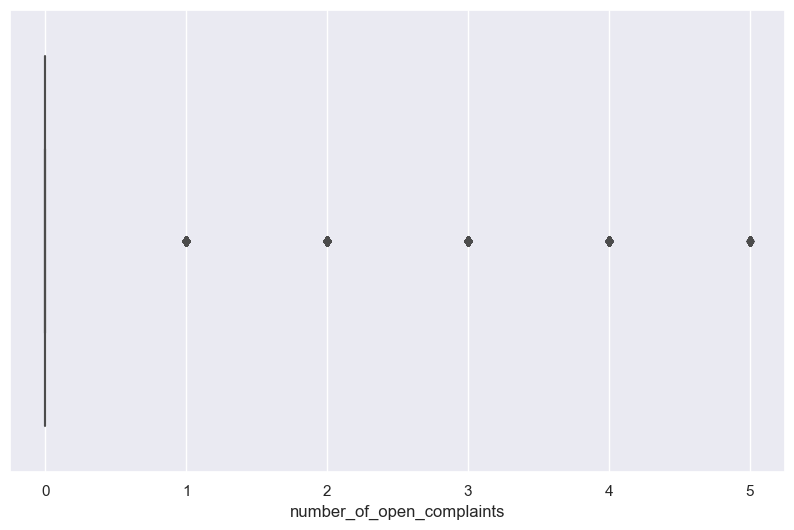

In [130]:
sns.boxplot(customer_df['number_of_open_complaints'])

<AxesSubplot:xlabel='number_of_policies'>

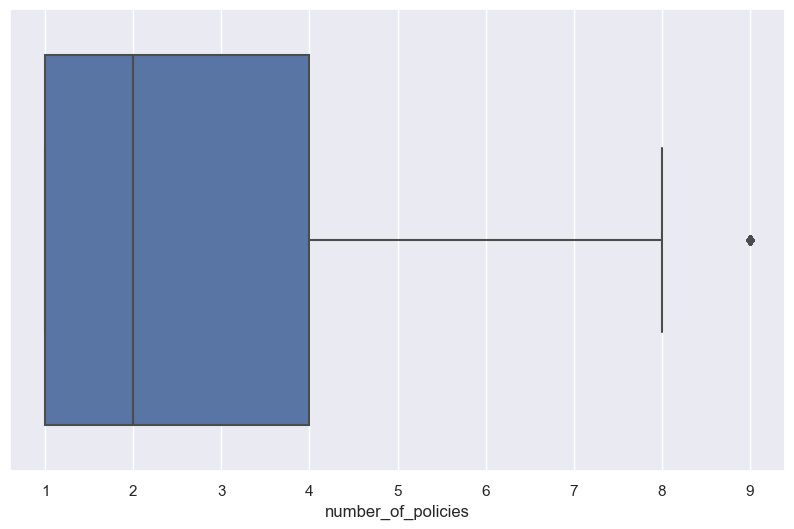

In [132]:
sns.boxplot(customer_df['number_of_policies'])

<AxesSubplot:xlabel='total_claim_amount'>

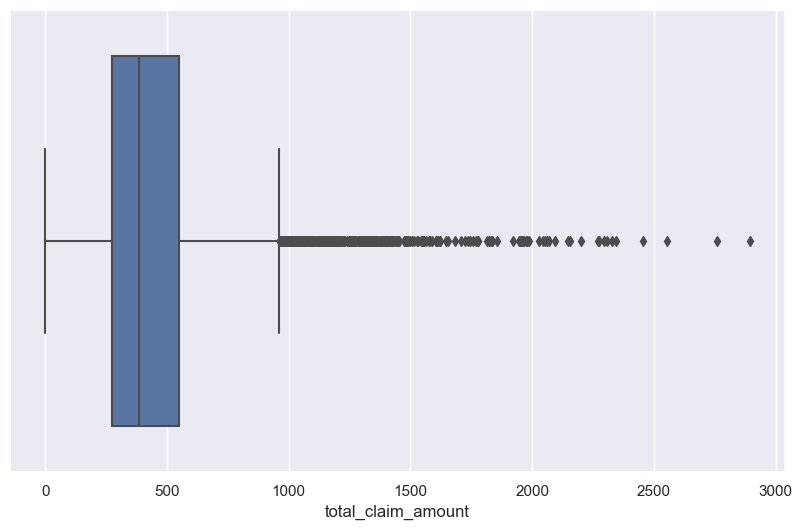

In [133]:
sns.boxplot(customer_df['total_claim_amount'])

### 10. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [134]:
customer_df.isnull().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [ ]:
#There's nothing to be done, because all the nulls have been removed already.